<a href="https://colab.research.google.com/github/matchbou/Public/blob/master/LinerReg%2BKernelReg_on_Scikit-learn_20190709aa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#scikit-learnで線形モデルとカーネルモデルの回帰分析をやってみた - イラストで学ぶ機械学習

# https://qiita.com/kotaroito/items/4eb29d42d7f8c534332f

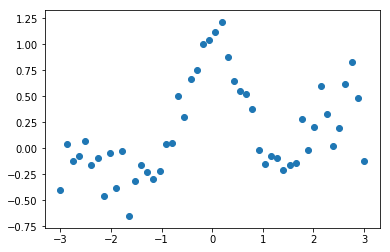

In [2]:
#データを用意する
#右肩上がりのトレンド（第二項）に周期変動（第一項）とノイズ（第三項）が乗っているというデータを用意します。本に比べてノイズパラメタを増やしています。


import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

n = 50; N = 1000

x = np.linspace(-3, 3, n)
X = np.linspace(-3, 3, N)

pix = np.pi * x
y = np.sin(pix) / pix + 0.1 * x + 0.2 * np.random.randn(n)

x = x.reshape(-1, 1)
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

plt.scatter(x,y)

0.1296593098677199


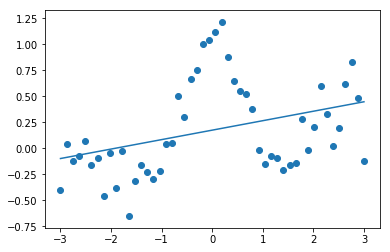

In [3]:
#LinearRegression
#何も制約が付かないプレーンな線形モデルであるsklearn.linear_model.LinearRegressionを利用して、フィッティングしてみます。



from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(x, y)

p = clf.predict(X)

plt.scatter(x, y)
plt.plot(X,p)

print(clf.score(x, y))

0.8136462739453014


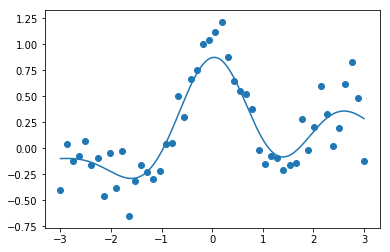

In [4]:
#KernelRidge
#周期的に変動するデータは線形モデルと相性が悪いので、次はガウスカーネルモデルを利用します。


from sklearn.kernel_ridge import KernelRidge

clf = KernelRidge(alpha=1.0, kernel='rbf')
clf.fit(x, y)

p = clf.predict(X)

plt.scatter(x, y)
plt.plot(X, p)

print(clf.score(x, y))

0.9481522772338019


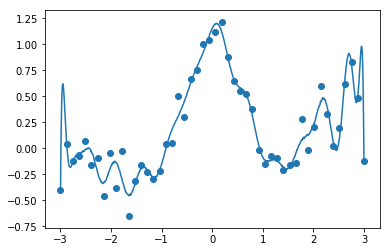

In [5]:
#KernelRidgeを使わない最小二乗学習
#KernelRidgeを使わずに、RBFカーネルによる最小二乗学習を実行することもできます。

#sklearn.linear_model.LinearRegression
#まず制約を何も付けずにやってみます。

from sklearn.metrics.pairwise import rbf_kernel

kx = rbf_kernel(x, x)
KX = rbf_kernel(X, x)

clf = LinearRegression()
clf.fit(kx, y)

p = clf.predict(KX)

plt.scatter(x, y)
plt.plot(X, p)

print(clf.score(kx, y))

0.8349957507453298


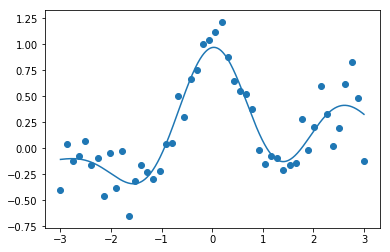

In [6]:
#sklearn.linear_model.Ridge
#次に、l2制約を入れてみます。

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge

kx = rbf_kernel(x, x)
KX = rbf_kernel(X, x)

clf = Ridge()
clf.fit(kx, y)

p = clf.predict(KX)

plt.scatter(x, y)
plt.plot(X, p)

print(clf.score(kx, y))

0.7895233436831859


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0011910720642274164, tolerance: 0.0009954810115067264
  positive)


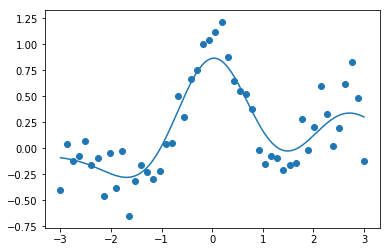

In [7]:
#sklearn.linear_model.Lasso
#今度はl1制約付き（ラッソ回帰）でやってみます。

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Lasso

kx = rbf_kernel(x, x)
KX = rbf_kernel(X, x)

clf = Lasso(alpha=0.01)
clf.fit(kx, y)

p = clf.predict(KX)

plt.scatter(x, y)
plt.plot(X, p)

print(clf.score(kx, y)) # 0.820550922167

In [8]:
#ラッソ回帰はパラメタをスパースにするので、確認してみると...

print(clf.coef_) 

[ 0.          0.          0.          0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.11736571 -0.18231994 -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.31814985  0.71182283  0.          0.          0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.20242955
 -0.         -0.         -0.         -0.          0.          0.
  0.          0.          0.          0.          0.43892351  0.
  0.          0.        ]


0.8158810959563141


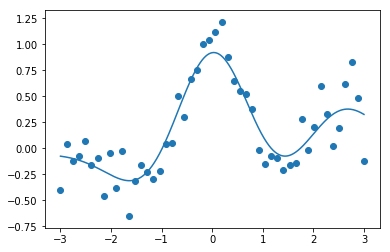

In [9]:
#sklearn.linear_model.ElasticNet
#モデルを挿げ替えるだけですが、一応l1 + l2制約付き（ElasticNet）でやってみます。

from sklearn.linear_model import ElasticNet

kx = rbf_kernel(x, x)
KX = rbf_kernel(X, x)

clf = ElasticNet(alpha=0.01)
clf.fit(kx, y)

p = clf.predict(KX)

plt.scatter(x, y)
plt.plot(X, p)

print(clf.score(kx, y))